In [1]:
import os
import glob
import pandas as pd
os.chdir(".")

In [7]:
res1 = [i for i in glob.glob('extrapolation/*.csv')]
df = pd.concat([pd.read_csv(f) for f in res1 ])
df = df.loc[:, (df != df.iloc[0]).any()] 

In [8]:
df = df.drop(["name_flag", "dataset", "activation", "final_layer_noise"], axis=1)

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.to_csv("dvip_extrapolation.csv", index = False)

In [17]:
df.groupby(["bb_alpha", "iterations"]).mean()

epochs  split    LOSS_train  RMSE_train  NLL_train  \
bb_alpha iterations                                                       
0.0      10000        10000     50  8.000748e+07   36.031175   5.682715   
         15000        15000     50  1.079631e+08   51.720457   5.771354   
         20000        20000     50  1.251958e+08   63.718824   6.439083   
1.0      10000        10000     50  1.199710e+03   53.991033   3.784315   

                     CRPS_train          LOSS       RMSE        NLL       CRPS  
bb_alpha iterations                                                             
0.0      10000        20.801676  8.000905e+07  45.494373  10.185474  31.002973  
         15000        30.605550  1.079515e+08  64.128276   8.739185  44.340137  
         20000        37.907903  1.251968e+08  78.941075   9.591720  55.355998  
1.0      10000        31.703924  1.425170e+03  61.683664   4.832859  40.733632

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

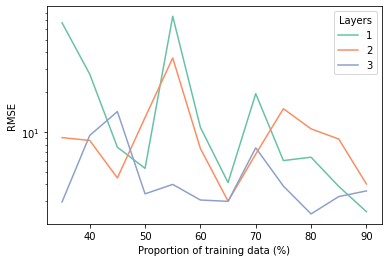

In [29]:
grid = sns.lineplot(data = df.query("bb_alpha == 1.0 and iterations == 10000 and split > 30"), x = "split", y = "RMSE", hue = "vip_layers", legend=False, palette = "Set2")
grid.set(yscale="log")
plt.legend(title='Layers', loc='best', labels=['1', '2', '3']);
plt.xlabel("Proportion of training data (%)");
